In [31]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocessing_input


ImportError: cannot import name 'preprocessing_input' from 'tensorflow.keras.applications.vgg16' (/usr/local/lib/python3.10/dist-packages/keras/_tf_keras/keras/applications/vgg16/__init__.py)

In [7]:
benign_files = "sample_data/dataset/Benign"
malignant_files = "sample_data/dataset/Malignant"
normal_files = "sample_data/dataset/Normal"

In [8]:
# function to load the images from the directories

def load_images(directory, label):
  images = []
  labels = []
  for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
      img_path = os.path.join(directory, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        img = cv2.resize(img, (128, 128))
        images.append(img)
        labels.append(label)
  return images, labels

In [9]:
benign_images, benign_labels = load_images(benign_files, label=0)
malignant_images, malignant_labels = load_images(malignant_files, label=1)
normal_images, normal_labels = load_images(normal_files, label=2)

In [10]:
images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels

In [13]:
images = np.array(images)
labels = np.array(labels)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [18]:
categories = {
    "Benign": benign_files,
    "Malignant": malignant_files,
    "Normal": normal_files
}

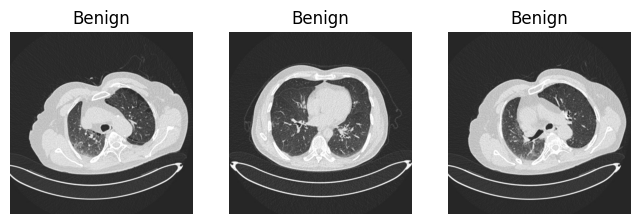

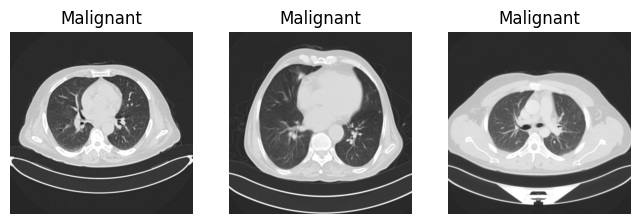

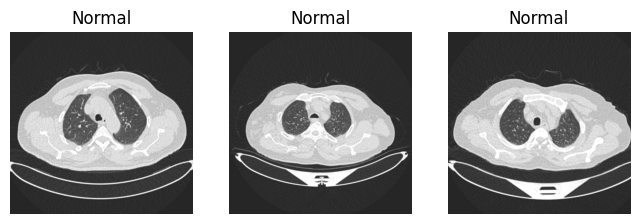

In [21]:
for category, image_dir in categories.items():
  image_path = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith((".jpg", ".png"))]

  fig, ax = plt.subplots(1, 3, figsize=(8, 8))
  ax = ax.ravel()

  for i, img_path in enumerate(np.random.choice(image_path, size=3, replace=False)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title(category)
  plt.show()

In [26]:
model = Sequential([
  Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 1)),
  MaxPooling2D((2,2)),
  Conv2D(64, (3, 3), activation = 'relu'),
  MaxPooling2D((2,2)),
  Conv2D(128, (3, 3), activation = 'relu'),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(512, activation = 'relu'),
  Dropout(0.5),
  Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_encoded = to_categorical(y_train, num_classes = 3)
y_test_encoded = to_categorical(y_test, num_classes = 3)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train_encoded : ", y_train_encoded)

history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

print("Training history : ", history.history)

Shape of X_train :  (877, 128, 128)
Shape of y_train_encoded :  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 432ms/step - accuracy: 0.4918 - loss: 62.5839 - val_accuracy: 0.7841 - val_loss: 0.6322
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8085 - loss: 0.5096 - val_accuracy: 0.9432 - val_loss: 0.2087
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9281 - loss: 0.2029 - val_accuracy: 0.9432 - val_loss: 0.2032
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9467 - loss: 0.1786 - val_accuracy: 0.9602 - val_loss: 0.1615
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9195 - loss: 0.2334 - val_accuracy: 0.9716 - val_loss: 0.1544
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9610 - loss: 0.1156 - val_accuracy: 0.9318 - val_loss: 0.2354
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9709 - loss: 0.1090 - val_accuracy: 0.9886 - val_loss: 0.0726
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9653 - loss: 0.0812 - val_accuracy: 0.9659 - val_loss:

In [27]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def history_plot(history):
    epochs = len(history.history['accuracy'])
    fig1 = make_subplots()
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["accuracy"], name="Training Accuracy"))
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_accuracy"], name="Validation Accuracy"))
    fig1.update_layout(title="Training and Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy")
    fig1.show()

    fig2 = make_subplots()
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["loss"], name="Training Loss"))
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_loss"], name="Validation Loss"))
    fig2.update_layout(title="Training and Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")
    fig2.show()

history_plot(history)

In [28]:
y_test_encoded = to_categorical(y_test, num_classes=3)

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.9971 - loss: 0.0214
Test Loss: 0.03312155231833458
Test Accuracy: 0.9909090995788574


In [39]:
def load_and_preprocess_image(img_path, target_size=(128, 128)):
  img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array / 255.0
  return img_array

In [40]:
def predict_image(model, img_path):
  img_array = load_and_preprocess_image(img_path)
  prediction = model.predict(img_array)
  class_index = np.argmax(prediction, axis = 1)
  return class_index[0]

In [48]:
class_labels = ['Benign', 'Malignant', 'Normal']

test_img = 'sample_data/dataset/testing/test3.png'

predicted_class_index = predict_image(model, test_img)
predicted_class = class_labels[predicted_class_index]

print(f'The model predicts that the image as : {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The model predicts that the image as : Normal
